# <p><font color=dodgerblue>&#9658; Artificial Neural Networks and Deep Architectures (DD2437) &#9664;</font></p>
<div class="alert alert-info">

Syllabus: https://www.kth.se/student/kurser/kurs/kursplan/DD2437-20191.pdf?lang=en

Course page: https://www.kth.se/social/course/DD2437/

Teacher page: http://www.csc.kth.se/~paherman/index.htm & https://www.kth.se/profile/paherman



# Lab assignment 2
## Radial basis functions, competitive learning and self-organisation

</div>

***
# <p> &#128025; Instructions </p> 
#### Aim and objectives
After completion of the lab assignment, you should be able to
- know how to build the structure and perform training of an RBF network for either classification or regression purposes
- be able to comparatively analyse different methods for initialising the structure and learning the weights in an RBF network
- know the concept of vector quantisation and learn how to use it in NN context
- be able to recognise and implement different components in the SOM algorithm
- be able to discuss the role of the neighbourhood and analyse its effect on the self-organisation in SOMs
- know how SOM-networks can be used to fold high-dimensional spaces and cluster data

#### Background
see link https://github.com/tgll/neuralnets_labs/blob/master/lab2/annda_lab2.pdf <br>
(Lab instructions in the same folder)

(Radial-basis function networks, Computing the weight matrix, The SOM algorithm)

<p><font color=white>emojis https://www.w3schools.com/charsets/ref_emoji.asp</font></p>

#### Background preliminary questions (& notes) :

- **What is the lower bound for the number of training examples, N?** <br>
The number of training examples N must not be lower than the number of hidden units.<br>
N max = 62
- **What happens with the error if N = n? Why?**<br>
N = number of input samples<br>
n = number of neurons/nodes/units<br>
The system is overdetermined.<br>
Something linked to points in an dimensional hyperperspace / subspace
The model can only reach points lying in some fixed plane and can never exactly match y_hat if it lies somewhere outside the plane<br>
If N = n, the predicted values at the points for which the data values are known will be the known values. The number of input points n should be larger than the number of RBF nodes in the hidden layer
- **Under what conditions, if any, does (4) have a solution in this case?**<br>
If some of the equations are linear combination of each other
- **During training we use an error measure defined over the training examples. Is it good to use this measure when evaluating the performance of the network? Explain!**<br>
The NN learns from the input space during the training process, that's why the predicted true values should be good only after few steps and give a good performance which can be evaluated with a validation set.

***
# <p> &#128025; Assignment - Part I </p>

In [1]:
# IMPORTING THE LIBRARIES
import numpy as np #cool for maths and linear algebra
import decimal
from scipy import signal
import matplotlib.pyplot as plt #cool for plots
import seaborn as sns # cool for cool plots

import matplotlib.colors as clr # more plots and color
from matplotlib.colors import ListedColormap # also more plots and color
#%matplotlib inline # interactive cool plots included in notebook

## <p> &#128044; 1. Batch mode training using least squares - supervised learning of network weights. </p>


In this simple assignment, you should focus on supervised learning of weights of the RBF network built to address a simple regression problem. **Please implement first batch learning from scratch** without using dedicated NN toolboxes. <br>
**The two function to approximate are <font color=dodgerblue>sin(2x)</font> and <font color=dodgerblue>square(2x)</font>** (square is a rectangular curve serving as a "box" envelope for the sine wave, i.e. it is 1 for arguments where the sin>=0 and -1 otherwise). Note that the input space is R, so **each <font color=dodgerblue>pattern</font>** x1; x2; .... ; xN in (6) **is in fact a scalar**. Begin by creating a column vector containing the points (<font color=dodgerblue>patterns</font>) where you want to evaluate your function. Let's limit the regression to the interval [0; 2pi]. **Sample this interval starting from 0 with the step size of 0.1 and calculate the values of the two functions at the these points to obtain the corresponding training sets.** The testing sets could be generated analogously with sampling starting from <font color=dodgerblue>0.05</font> and the same step size.

- Try to <font color=dodgerblue>vary the number of units to get the absolute residual error below 0.1, 0.01 and 0.001</font> in the residual value (absolute residual error is understood as the average absolute difference between the network outputs and the desirable target values). Please discuss the results, <font color=dodgerblue>how many units are needed for the aforementioned error thresholds</font>?

- How can you simply transform the output of your RBF network to <font color=dodgerblue>reduce the residual error to 0 for the square(2x) problem</font>? Still, <font color=dodgerblue>how many units</font> do you need? In what type of applications could this transform be particularly useful?
<br>
<br>

**REMINDERS**:
<img src="img/RBF.png" width="350" align="center"/> <br>
<img src="img/XOR-bool.png" width="700" align="left"/> <img src="img/XOR-circuit.png" width="250" align="left"/>

Gaussian function page 2
<img src="img/gaussian.png" width="350" align="center"/> <br>

\begin{equation*}
\phi_i(x)=e^{\frac{-(x-\mu_i)^2}{2 \sigma_i^2}}
\end{equation*}

In [2]:
# GENERATE DATA
# range
def data_range(x, y, jump):
    x = decimal.Decimal(x) # rounded decimal floating point
    while x < y:
        yield float(x)
        x += decimal.Decimal(jump)

# data
def generate_data(func, interval, step, plot = False, noise_var = None):
    patterns = list(data_range(interval[0],interval[1], str(step)))
    f = np.vectorize(func)
    output = f(patterns)
    #gaussian noise
    if noise_var:
        noise = np.random.normal(loc = 0, scale = noise_var, size = np.shape(output))
        output =np.add(output, noise)
    if plot:
        plt.plot(patterns, output)
        plt.show()
    patterns = np.reshape(patterns, (len(patterns),1))
    output = np.reshape(output, (len(output),1))
    patterns = np.array(patterns)
    output = np.array(output)
    return patterns, output


In [3]:
# SINUS 2(x)
# train patterns (inputs) and response (outputs)
SIN_train_patterns, SIN_train_response = generate_data(lambda x: np.sin(2*x),[0,2*np.pi], 0.1)
# test
SIN_test_patterns, SIN_test_response = generate_data(lambda x: np.sin(2*x),[0.05,2*np.pi], 0.1)

# SQUARE 2(x)
# train patterns (inputs) and response (outputs)
SQR_train_patterns, SQR_train_response = generate_data(lambda x: signal.square(2*x), [0,2*np.pi], 0.1)
# test
SQR_test_patterns, SQR_test_response = generate_data(lambda x: signal.square(2*x), [0.05,2*np.pi], 0.1)

In [4]:
class RBF():
    def __init__(self, mu_list, sigma):
        self.weights = None
        self.mu = mu_list
        self.train_phi = None
        self.sigma = sigma
        self.trained = False
    
    def initiate_nodes(mu_list, sigma):
        self.mu = mu_list
    
    # gaussian phi function
    # phi(x)=e^(-(x-mu)^2) / (2 * sigma^2) )
    def gaussian(self, x, mu, sigma):
        return np.exp((-(np.linalg.norm(x-mu))**2)/(2*sigma**2)) 
    
    # gaussian phi iterations
    # \phi_i(x)=e^{\frac{-(x-\mu_i)^2}{2 \sigma_i^2}}
    def calculate_phi(self, data):
        N = len(data) # 62
        n = len(self.mu)
        phi = np.zeros((N,n))
        for i in range(N):
            for j in range(n):
                phi[i,j] = self.gaussian(data[i,:], self.mu[j,:], self.sigma)
        return phi
    
    def batch_train(self, data, response):
        self.train_phi = self.calculate_phi(data)
        phi_transpose = np.transpose(self.train_phi)
        self.weights = np.linalg.inv(np.dot(phi_transpose,self.train_phi)).dot(phi_transpose).dot(response)
        self.trained = True
    
    def data_shuffler(self, data, response):
        data_dim = np.shape(data)[1]
        response_dim = np.shape(response)[1]
        shuffler = np.hstack((data, response))
        np.random.shuffle(shuffler)
        return shuffler[:,0:data_dim], shuffler[:,data_dim:data_dim+response_dim] # will break down with multidimensional data (?)

    def sequential_train(self, data, response, epochs, eta):
        data, response = self.data_shuffler(data, response)
        self.train_phi = self.calculate_phi(data)
        self.weights = np.random.randn(len(self.mu),1)
        
        for epoch in range(epochs):
            for data_index in range(len(data)):
                inner = response[data_index] - np.dot(self.train_phi[data_index,:],self.weights)
                self.weights = np.add(self.weights, np.reshape(eta*inner*np.transpose(self.train_phi[data_index,:]),np.shape(self.weights)))
                
        
    def predict(self,data):
        phi = self.calculate_phi(data)
        return phi.dot(self.weights)
    
    def calculate_error(self, data, response):
        predictions = self.predict(data)
        return np.mean(np.abs(response-predictions))
    
    # PLOT training and testing results + residual errors
    def plottraintest(self, train_data, train_response, test_data, test_response, batch_train = True, **kwargs):
            if batch_train:
                self.batch_train(train_data, train_response)
            else:
                self.sequential_train(train_data, train_response, kwargs['epochs'], kwargs['eta'])
            train_error = self.calculate_error(train_data, train_response)
            test_error = self.calculate_error(test_data, test_response)
            if np.shape(self.mu)[1] <= 1:
                plt.plot(train_data, RBF1.predict(train_data),'c.', lw=2)
                plt.plot(test_data, RBF1.predict(test_data),'b.', lw=2)
                plt.legend(['train','test'])
                plt.title("RBF (training & testing)")
                plt.figtext(.02, .02, "Training residual error is {}".format(train_error))
                plt.figtext(.02, -.04, "Testing residual error is {}".format(test_error))
                plt.show()
            else:
                print("Training residual error is {}".format(train_error))
                print("Testing residual error is {}".format(test_error))


### <p> &#128032; Variation of number of units </p>
#### <p> &#127754; SIN(2X) BATCH </p>

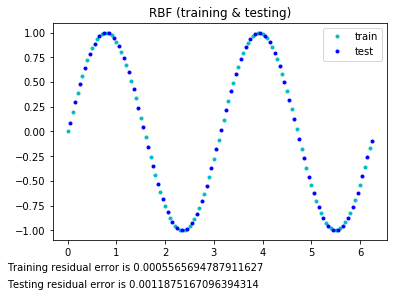

In [5]:
# BATCH sin
def even_rbf_center(count):
    mu_list = []
    for i in range(count):
        mu_list.append(i*2*np.pi/(count))
    mu_list = np.reshape(np.array(mu_list), (len(mu_list),1))
    return mu_list

mu_list = even_rbf_center(50)
sigma = 0.1
RBF1 = RBF(mu_list, sigma)

RBF1.plottraintest(SIN_train_patterns, SIN_train_response, SIN_test_patterns, SIN_test_response, epochs = 100)

The number of Nodes n should not exceed the number of samples N (N max = 62) in batch mode. <br>
Errors:
- for n = 15: 0.02596
- **for n = 50: 0.00128**
- for n = 65: 41442821849.093376

#### <p> &#127754; SQUARE(2X) BATCH </p>

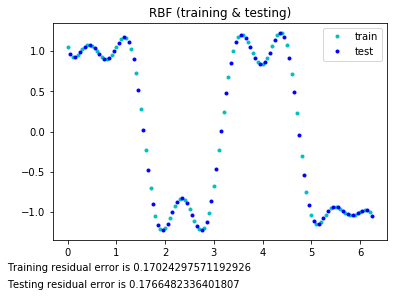

In [6]:
# BATCH sqr
mu_list = even_rbf_center(20)
sigma = 0.6
mu_list = np.reshape(np.array(mu_list), (len(mu_list),1))
RBF1 = RBF(mu_list, sigma)

RBF1.plottraintest(SQR_train_patterns, SQR_train_response, SQR_test_patterns, SQR_test_response, epochs = 100)

Errors:
- for n = 10: 0.27856
- **for n = 20: 0.17664**
- for n = 25: 1.36615

#### <p> &#127754; SEQENTIAL </p>

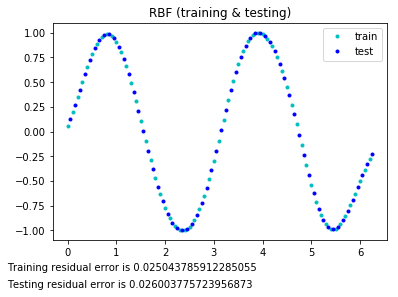

In [7]:
# seq sqr
mu_list = even_rbf_center(20)
sigma = 0.6
mu_list = np.reshape(np.array(mu_list), (len(mu_list),1))
RBF1 = RBF(mu_list, sigma)

RBF1.plottraintest(SIN_train_patterns, SIN_train_response, SIN_test_patterns, SIN_test_response, batch_train = False, eta=0.3, epochs = 100)

Errors:
- for n = 5: 0.20178
- **for n = 20: 0.01316**
- for n = 40: 0.02037
- for n = 54: 4.83231e+244

### <p> &#128032; Minimizing the residual error </p>

Having a treshold output out of the hidden nodes equal to 1 for (strictly) positive outputs, and -1 for negative outputs. 

A minimum of hidden nodes is necessary (like above 5 I would say) otherwise it is not good (not reaching a error value equals to zero)

Good technique for classification

<font color=white>
**old notes** TO UPDATE
With 12 units evenly distributed, variance = 0.1, the Absolute residual error was: 0.32240
the error did not change significantly with variance 0.3 or 0.01
With 20 units evenly distributed, variance = 0.1, the Absolute residual error was: 0.131492
Adding a node in the very end of the interval reduced it somewhat to 0.12314
30 units: 0.03243
40 units: 0.0313 
</font>

## <p> &#128044; 2. Regression with noise </p>

In [8]:
#noise_var = 0.3

## <p> &#128044; 3. Competitive learning (CL) to initialise RBF units </p>

Now we will take a look at the problem of placing the RBFs in input space. We will use a version of CL for Vector Quantization. A simple algorithm we use here can only adjust the positions of the RBF units without adjusting the width of the units. Therefore you will have to make these adjustment yourselves based on the distribution of data around the cluster centers found with this simple CL algorithm. At each iteration of CL a training vector is randomly selected from the data. The closest RBF unit (usually called the winning unit) is computed, and this unit is updated, in such a way that it gets closer to the training vector. The other units may or may not (depending on the version of CL used) be moved towards it too, depending on distance. This way the units will tend to aggregate in the clusters in the data space. Please, couple the CL-based approach to RBF network initilisation with the aforementioned delta learning for the output weights.

- <font color=dodgerblue>Compare the CL-based approach with your earlier RBF network where you manually positioned RBF nodes in the input space.</font> Make this comparison for both <font color=dodgerblue>noise-free</font>  and <font color=dodgerblue>noisy</font>  approximation of sin(2x) and use the number of units corresponding to the best performing architectures found in sections 3.1 and 3.2, respectively. Pay attention to convergence, generalisation performance and the resulting position of nodes.
- Introduce a strategy to <font color=dodgerblue>avoid dead units</font>, e.g. by having more than a single winner. Choose an example to demonstrate this effect in comparison with the vanilla version of our simple CL algorithm.
- Configure an RBF network with the use of CL for positioning the RBF units to approximate a two-dimensional function, i.e. from R2 to R2. As training examples please use noisy data from <font color=dodgerblue>ballistical experiments</font> where inputs are pairs: <angle, velocity> and the outputs are pairs: <distance, height>. There are <font color=dodgerblue>two datasets available: ballist for training and balltest for testing.</font> First thing to do is to load the data and then train the RBF network to find a mapping between the input and output values. Please be careful with the selection of a suitable number of nodes and their initialisation to avoid dead-unit and overfitting problems. Report your results and observations, ideally with the support of illustrations, and document your analyses (e.g., inspect the position of units in the input space).

#### <p> &#128032; Comparaison between manually positioning RBF VS CL-based approach (with nodes noise free VS noisy approx) </p>

**A)  CL-based approach**

1- noise free

2- noisy

**B) Manually**

1- noise free

2- noisy

#### <p> &#128032; Avoid dead units </p>

#### <p> &#128032; Ballist and balltest </p>

In [43]:
#cd data_lab2

C:\Users\tgill\Documents\2.COURS\5.HCID\M2_StockholmKTH\ML\LABS\ArtificialNeuralNet_labs\lab2\data_lab2


In [44]:
#Read data
ballistic_data = np.loadtxt(open("data_lab2/ballist.dat", "rb"), delimiter=" ", skiprows=0)
balltest_data = np.loadtxt(open("data_lab2/balltest.dat", "rb"), delimiter=" ", skiprows=0)

train_ballistic = ballistic_data[:,0:2]
train_ballistic_response = ballistic_data[:,2:4]
test_ballistic = balltest_data[:,0:2]
test_ballistic_response = balltest_data[:,2:4]

In [47]:
# Use competitive learning


***
# <p> &#128025; Assignment - Part II </p>

**REMINDERS**:
SOM (Self Organising Maps) are a unsupervised neural network technique.

Based on K-means (exemple du kebab ?)


Papers: <br>
[Kohonen, T. (1990). The self-organizing map. Proceedings of the IEEE, 78(9), 1464-1480.](https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf)<br>
[Kohonen, Teuvo. "Exploration of very large databases by self-organizing maps." In Proceedings of International Conference on Neural Networks (ICNN'97), vol. 1, pp. PL1-PL6. IEEE, 1997.](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.115.3247&rep=rep1&type=pdf)<br>
[Kohonen's Self Organizing Feature Maps website](http://www.ai-junkie.com/ann/som/som1.html)

How they work:


Important to remember:
- SOMs retain typology of the input set
- SOMs reveal correlations that are not easy to identify
- SOMs classify data without supervision
- No target vector -> no backpropagation
- No lateral connections between output nodes

**INSTRUCTIONS**:

The SOM algorithm can be used to assign a natural order to objects characterized only by a large number of attributes. This is done by letting the SOM algorithm create a topological mapping from the high-dimensional attribute space to a one-dimensional output space.<br>

<font color=white>xxx</font> As sample data, <font color=dodgerblue>please use a simple **database** of 32 animal species where each animal is characterized by 84 binary attributes.  The data is in the file **animals.dat**. This file defines the 32 * 84 matrix props where each row contains the attributes of one animal.</font> The data are organised in row-by-row manner. There is also a file <font color=dodgerblue>**animalnames.dat** with the names of the animals in the same order.</font> This vector should only be used to <font color=dodgerblue>print out the final ordering</font> in a more readable format. These 84 values serve as input and 100 nodes arranged in a one-dimensional topology, i.e. in a linear sequence, constitute the output.<br>

<font color=white>xxx</font> Train the SOM network by showing the attribute vector of one animal at a time. The SOM algorithm should now be able to <font color=dodgerblue>create a mapping onto the 100 output nodes such that similar animals tend to be **close** while different animals tend to be **further away**</font> along the sequence of nodes. In order to get this one-dimensional topology, the <font color=dodgerblue>network has to be trained using a one-dimensional neighbourhood</font>.<br>

<font color=white>xxx</font> In particular, your task is to <font color=dodgerblue>write the **core algorithm**. Use a weight matrix of size 100 * 84 initialized with **random numbers between zero and one**. Use an outer loop to train the network for about **20 epochs**, and an inner loop which loops through the 32 animals, one at a time</font>. For each animal you will have to pick out the corresponding row from the props matrix. Then find the row of the weight matrix with the shortest distance to this attribute vector (p). Note that you cannot use a scalar product since the attribute vectors are not normalized. Therefore you have to <font color=dodgerblue>take the difference between the two vectors and calculate the length of this difference vector</font>. Once you have the index to the winning node, it is time to update the weights. Update the weights so that they come a bit closer to the input pattern. A suitable step size is 0:2. Note that <font color=dodgerblue>only weights to the winning node and its neighbours should be updated</font>. The neighbours are in this case the nodes with an index close to that of the winning one. You should <font color=dodgerblue>start with a large neighbourhood and gradually make it smaller</font>. Make the size of the neighbourhood depend on the epoch loop variable so that you start with a neighbourhood of about 50 and end up close to one or zero. Finally, you have to <font color=dodgerblue>print out the result, i.e. the animals in a natural order</font>. Do this by looping through all animals once more, again calculating the index of the winning output node. Save these indices in a 32 element vector pos. By sorting this vector we will get the animals in the desired order. Check the resulting order. <font color=dodgerblue>Does it make sense?</font> If everything works, animals next to each other in the listing should always have some similarity between them. Insects should typically be grouped together, separate from the different cats, for example.



## <p> &#128044; 1. Topological Ordering of Animal Species </p>

In [25]:
#cd data_lab2

[WinError 2] Le fichier spécifié est introuvable: 'data_lab2'
C:\Users\tgill\Documents\2.COURS\5.HCID\M2_StockholmKTH\ML\LABS\ArtificialNeuralNet_labs\lab2\data_lab2


In [26]:
# Read and print animal names
w = np.random.rand(100,84)
w.shape
animals = np.genfromtxt('data_lab2/animals.dat',delimiter =',')
len(animals)

f = open('data_lab2/animalnames.txt', "r")
animal_names = f.readlines()
f.close()

w = np.random.uniform(0,1,(100,84))
x = animals.reshape((32,84))
x.shape[1]

animal_names

["'antelop'\t\n",
 "'ape'\t\n",
 "'bat'\t\n",
 "'bear'\t\n",
 "'beetle'\t\n",
 "'butterfly'\t\n",
 "'camel'\t\n",
 "'cat'\t\n",
 "'crocodile'\t\n",
 "'dog'\t\n",
 "'dragonfly'\t\n",
 "'duck'\t\n",
 "'elephant'\t\n",
 "'frog'\t\n",
 "'giraffe'\t\n",
 "'grasshopper'\t\n",
 "'horse'\n",
 "'housefly'\n",
 "'hyena'\t\n",
 "'kangaroo'\t\n",
 "'lion'\t\n",
 "'moskito'\t\n",
 "'ostrich'\t\n",
 "'pelican'\t\n",
 "'penguin'\t\n",
 "'pig'\t\n",
 "'rabbit'\t\n",
 "'rat'\t\n",
 "'seaturtle'\t\n",
 "'skunk'\t\n",
 "'spider'\t\n",
 "'walrus'"]

In [20]:
def SOM(x, epochs, w):
  
  # random matrix  
  n_samples = x.shape[0]
  n_features = x.shape[1]
  n_nodes = w.shape[0]
  distance = np.zeros(n_nodes)
  
  for it in range (epochs):
    N_neighbours = int(50*(1-it/epochs))
    for i in range(n_samples):
      # compute minimum node
      for j in range(n_nodes):
        d = np.linalg.norm(x[i,:]-w[j,:])
        distance[j] = d
      winner = np.argmin(distance)
    
      # compute new boundary
      min_boundary = max(0,winner - N_neighbours)
      max_boundary = min(100, winner + N_neighbours)
    
      # update weights
      for j in range(min_boundary, max_boundary):
        w[j] = w[j] + 0.2*(x[i]-w[j])
        
  return w


def SOM_test (x,w):
  
  n = x.shape[0]
  indices = []
  n_samples = x.shape[0]
  n_features = x.shape[1]
  n_nodes = w.shape[0]
  distance = np.zeros(n_nodes)
  
  for i in range(n_samples):
      #Compute the minimum node
    for j in range(n_nodes):
        d = np.linalg.norm(x[i,:]-w[j,:])
        distance[j] = d
    winner = np.argmin(distance)
    indices.append(winner)
    
  return np.array(indices)

In [22]:
w = SOM(x,20,w)
w

array([[1.70793905e-07, 1.73306415e-53, 9.07008385e-02, ...,
        5.37215874e-54, 4.46484598e-50, 6.71244836e-03],
       [1.70793905e-07, 5.98509288e-54, 9.07008385e-02, ...,
        9.31890790e-56, 1.83309913e-50, 6.71244836e-03],
       [6.99571834e-08, 1.73804987e-55, 1.12894599e-01, ...,
        1.06577709e-55, 1.32383808e-51, 6.47219608e-03],
       ...,
       [1.86973754e-25, 1.00000000e+00, 9.75370781e-26, ...,
        3.64607931e-03, 9.96353921e-01, 6.48217350e-02],
       [5.70635915e-25, 1.00000000e+00, 3.48237984e-25, ...,
        3.64607931e-03, 9.96353921e-01, 6.48217350e-02],
       [3.27337122e-25, 1.00000000e+00, 4.58531322e-25, ...,
        3.64607931e-03, 9.96353921e-01, 6.48217350e-02]])

In [23]:
res = SOM_test (x,w)
res

array([28,  0, 18,  2, 98, 91, 32,  9, 51,  6, 94, 68, 18, 56, 31, 98, 40,
       86,  2, 22, 10, 89, 65, 71, 61, 34, 25, 15, 47,  0, 79, 13],
      dtype=int64)

In [24]:
Z = [x for _,x in sorted(zip(res,animal_names))]
np.transpose(Z)

array(["'ape'\t\n", "'skunk'\t\n", "'bear'\t\n", "'hyena'\t\n",
       "'dog'\t\n", "'cat'\t\n", "'lion'\t\n", "'walrus'", "'rat'\t\n",
       "'bat'\t\n", "'elephant'\t\n", "'kangaroo'\t\n", "'rabbit'\t\n",
       "'antelop'\t\n", "'giraffe'\t\n", "'camel'\t\n", "'pig'\t\n",
       "'horse'\n", "'seaturtle'\t\n", "'crocodile'\t\n", "'frog'\t\n",
       "'penguin'\t\n", "'ostrich'\t\n", "'duck'\t\n", "'pelican'\t\n",
       "'spider'\t\n", "'housefly'\n", "'moskito'\t\n", "'butterfly'\t\n",
       "'dragonfly'\t\n", "'beetle'\t\n", "'grasshopper'\t\n"],
      dtype='<U15')

## <p> &#128044; 2. Cyclic Tour </p>

In the previous example, the SOM algorithm in effect positioned a one-dimensional curve in the 84-dimensional input space so that it passed close to the places where the training examples were located. Now the same technique can be used to layout a curve in a two-dimensional plane so that it passes a set of points. In fact, this can be interpreted as a variant of the travelling salesman problem. The training points correspond to the cities and the curve corresponds to the tour. SOM algorithm should be able to find a fairly short route which passes all cities.

The actual algorithm is very similar to what you implemented in the previons task. In fact, you might be able to reuse much of the code. The main differences are:
- The input space has two dimensions instead of 84. The output grid should have 10 nodes, corresponding to the ten cities used in this example.
- The neighbourhood should be circular since we are looking for a circular tour. When calculating the neighbours you have to make sure that the first and the last output node are treated as next neighbours.
- The size of the neighbourhood must be smaller, corresponding to the smaller number of output nodes. It is reasonable to start with a neighbourhood size of 2 and then change it to 1 and finally zero.
- When presenting the result, it is better to plot the suggested tour graphically than to sort the cities.

The location of the ten cities is defined in the file cities.dat which defines the 10 * 2 matrix city. Each row contains the coordinates of one city (value between zero and one).

## <p> &#128044; 3. Data Clustering: Votes of MPs </p>

<font color=dodgerblue>The file votes.dat contains data about how all 349 members of the Swedish parliament did vote in the 31 first votes during 2004-2005</font>. There are also three additional files mpparty.dat, mpsex.dat and mpdistrict.dat with information about the party, gender and district of each member of parliament (MP). Finally, there is a file mpnames.txt with the names of the MPs. <font color=dodgerblue>Your task is to use the SOM algorithm to position all MPs on a 10 * 10 grid according to their votes</font>.

By looking at where the different parties end up in the map you should be able to see if votes of the MPs actually reflect the traditional left-right scale, and if there is a second dimension as well. You should be able to see which parties are far apart and which are close. By looking at the distribution of female and male MPs you could get some insight into whether MPs tend to vote differently depending on their gender. You can also see if there is a tendency for MPs from different districts to vote
systematically different.

The file votes.dat defines a 349 * 31 matrix votes. Data are organised in row-by-row manner. <font color=dodgerblue>Each one of 349 rows corresponds to a specific MP and each one of 31 columns to a specific vote. The elements are zero for a no-vote and one for a yes-vote. Missing votes (abstrained or non-present) are represented as 0:5.</font>

<font color=dodgerblue>You should use the SOM algorithm to find a topological mapping from the 31-dimensional input space to a 10 * 10 output grid. The network should be trained with each MPs votes as training data</font>. If all works well, voting patterns that are similar will end up close to each other in the 10 * 10 map. Please display the results with respect to different attributes (i.e. party, gender, district) and describe the results, provide your interpretation.

In [12]:
#cd data_lab2

In [16]:
# load data
votes = np.loadtxt('data_lab2/votes.dat', delimiter = ',', dtype = float)
mpnames = np.genfromtxt('data_lab2/mpnames.txt', delimiter ='\n', dtype = str)
mpsex  = np.genfromtxt('data_lab2/mpsex.dat', delimiter =',', dtype = float)
mpdistrict  = np.genfromtxt('data_lab2/mpdistrict.dat', delimiter =',', dtype = float)
mpparty = np.genfromtxt('data_lab2/mpparty.dat', delimiter =',', dtype = float)

votes = np.reshape(votes,(349,31))
votes_labels = list(range(len(votes)))

print("Number of members of the Swedish parliament:", len(mpsex))

Number of members of the Swedish parliament: 349


In [ ]:
# SOM (in file lab2-RBF-old but to update)

***
# <p> &#128025; Conclusions </p>